有写时候我们不仅要对一张图片进行处理，可能还会对一批图片处理。我们可以通过循环来执行处理，也可以调用程序自带的图片集合来处理。

图片集合函数为：

**skimage.io.ImageCollection(load_pattern,load_func=None)**

这个函数是放在 io 模块内的，带两个参数：
- 第一个参数 load_pattern ,表示图片组的路径，可以是一个 str 字符串；
- 第二个参数 load_func 是一个回调函数，我们对图片进行批量处理就可以通过这个回调函数实现。
  回调函数默认为 imread() ,即默认这个函数是批量读取图片。

先看一个例子：

In [1]:
import skimage.io as io
from skimage import data_dir
str=data_dir +'/*.png'  #把系统的图片加起来
coll=io.ImageCollection(str)
print(len(coll))

27


显示结果是27，说明系统自带了27张 png 的示例图片，这些图片都读取了出来，放在图片集合 coll 里。

如果我们想显示其中的一张图片，则可以在后面加上一行代码：

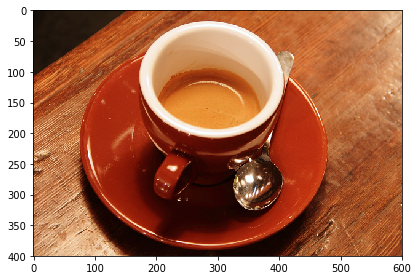

In [23]:
io.imshow(coll[10])
io.show()

如果一个文件夹里，我们既存放了一些 jpg 格式的图片，又存放了一些 png 格式的图片，现在想把他们全部读取出来，应该这么做：

In [38]:
import skimage.io as io
from skimage import data_dir
str='images/*.jpg:images/*.png'  #用冒号来串联
coll=io.ImageCollection(str)
print(len(coll))

39


注意这个地方**'images/*.jpg:images/*.png'**，是两个字符串合在一起的;

第一个是**'images/*.jpg'**, 第二个是**'images/*.png' **;

合在一起后，中间用冒号来隔开，这样就可以把 images 文件夹下的 jpg 和 png 格式的图片都读取出来。

如果还想读取存放在其它地方的图片，也可以一并加进去，只是中间同样用冒号来隔开。

**注释：** 

- io.ImageCollection 可以通过并联加 ” : ” 的方式将文件夹里面符合某一种格式的图像全部导入进来
- 导进来之后是 RGB 的 numpy 的 array 格式，与 caffe 的 ImageData 很像。
- 通过 io.imshow 来展示图像。

**io.ImageCollection()** 这个函数省略第二个参数，就是批量读取。

如果我们不是想批量读取，而是其它批量操作，如批量转换为灰度图，那又该怎么做呢？

那么先需要定义一个函数，然后将这个函数作为第二个参数，如：

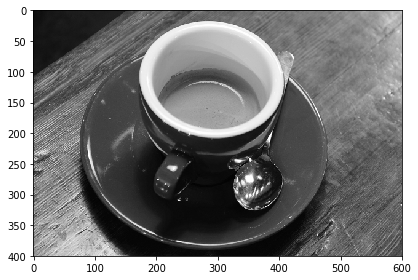

In [27]:
from skimage import data_dir,io,color

def convert_gray(f):
    rgb=io.imread(f)
    return color.rgb2gray(rgb)

str=data_dir+'/*.png'
#批量转化为灰度图（回调函数）
coll=io.ImageCollection(str,load_func=convert_gray)
io.imshow(coll[10])
io.show()

这种批量操作对视频处理是极其有用的，因为视频就是一系列的图片组合。

In [37]:
from skimage import data_dir,io,color

class AVILoader:
    video_file='myvideo.avi'

    def __call__(self,frame):
        return video_read(self.video_file,frame)
    
avi_load=AVILoader()

frames=range(0,1000,10)  #0,10,20,...
ic=io.ImageCollection(frames,load_func=avi_load)

这段代码的意思就是，将 myvideo.avi 这个视频中每隔10帧的图片读取出来，放在图片合集中。

得到图片合集以后，我们还可以将这些图片连接起来，构成一个维度更高的数组，连接图盘的函数为：

**skimage.io.concatenate_images(ic)**

带一个参数，就是以上的图片集合，如：

In [30]:
from skimage import data_dir,io,color
coll=io.ImageCollection('images/*.png')
mat=io.concatenate_images(coll)

ValueError: Image dimensions must agree.

**注意：** 
使用 concatenate_images(ic) 函数的前提是读取的这些图片尺寸必须一致，否则会出错。

下一次改正，用 Python 语法批量修改

我们看看图片连接的维度变化：

In [32]:
from skimage import data_dir,io,color
coll=io.ImageCollection('images/*.png')
print(len(coll))   #连接的图片数量
print(coll[0].shape) #连接前的图片尺寸，所有的都一样
mat=io.concatenate_images(coll)
print(mat.shape)    #连接后的数组尺寸

10
(290, 613, 3)


ValueError: Image dimensions must agree.

我们可以看到，将2个三维数组，连接成了一个4维数组。

如果我们对图片进行批量操作后，想把操作后的结果保存起来，也是可以办到的。

**例：** 把系统自带的所有的 png 图片，全部转化为 256*256 的 jpg 格式灰度图，保存在 images 文件夹下

改变图片的大小，我们可以使用 transfrom 模块的 resize() 函数，后续会讲到这个模块

In [40]:
from skimage import data_dir,io,transform,color
import numpy as np
def convert_gray(f):
    rgb=io.imread(f)    #依次读取rgb图片
    gray=color.rgb2gray(rgb)  #将rgb图片转换为灰度图
    dst=transform.resize(gray,(256,256))  #将灰度图片大小转换为 256*256
    return dst

str=data_dir+'/*.png'
coll=io.ImageCollection(str,load_func=convert_gray)
#通过 ImageCollection 函数中的参数 load_func对导入图像进行处理
for i in range(len(coll)):
    io.imsave('images/'+np.str(i)+'.jpg',coll[i])
    #循环保存图片，保存函数 io.imsave()

/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<img src="images/huidutu.png" style="width:600px;height:350px;">